In [4]:
import os
import pandas as pd

# Define the folder where CSVs are stored
folder_path = "../data/decomp/"  # Change this to your actual path

# List all CSV files in the directory
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# Dictionary to store datasets
datasets = {}

# Load each CSV into the dictionary
for file in csv_files:
    # Extract dataset name and season number
    parts = file.replace(".csv", "").split("_")
    if len(parts) == 4:
        dataset_name, season_number = parts[1], parts[-1]
        key = f"{dataset_name}_{season_number}"
        file_path = os.path.join(folder_path, file)
        
        # Load CSV into a DataFrame and store it in the dictionary
        datasets[key] = pd.read_csv(file_path)

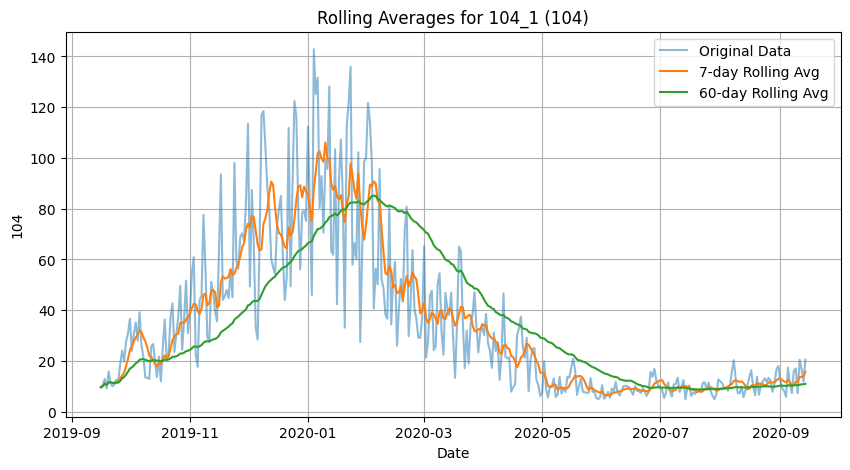

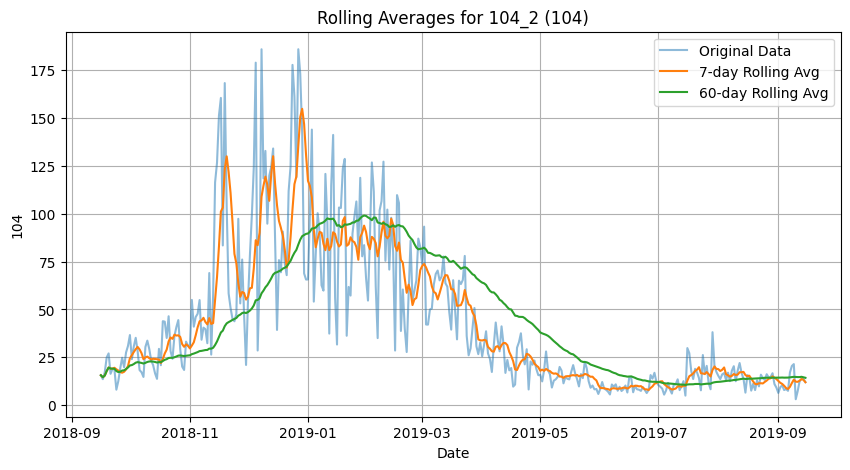

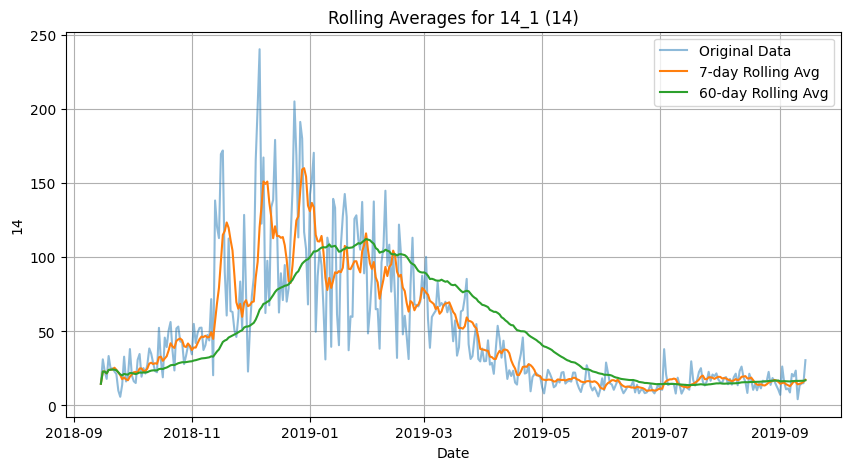

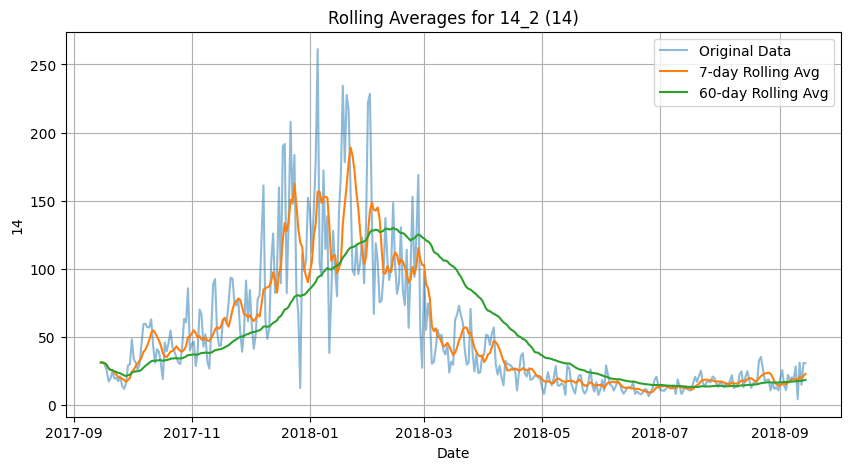

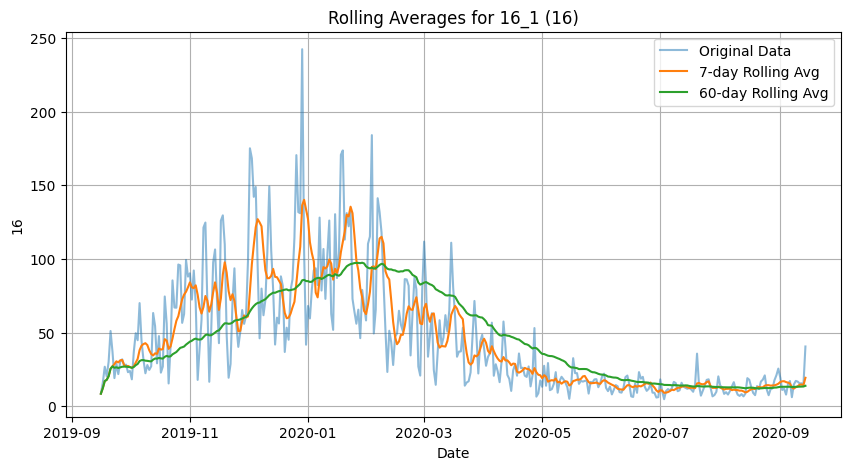

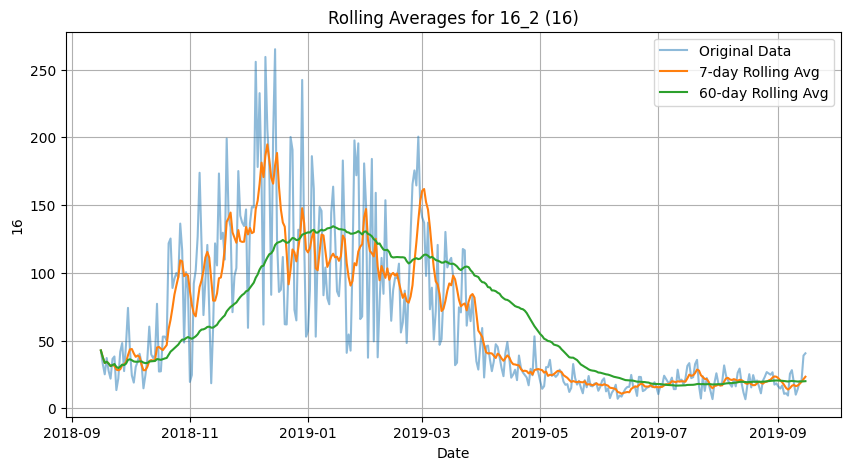

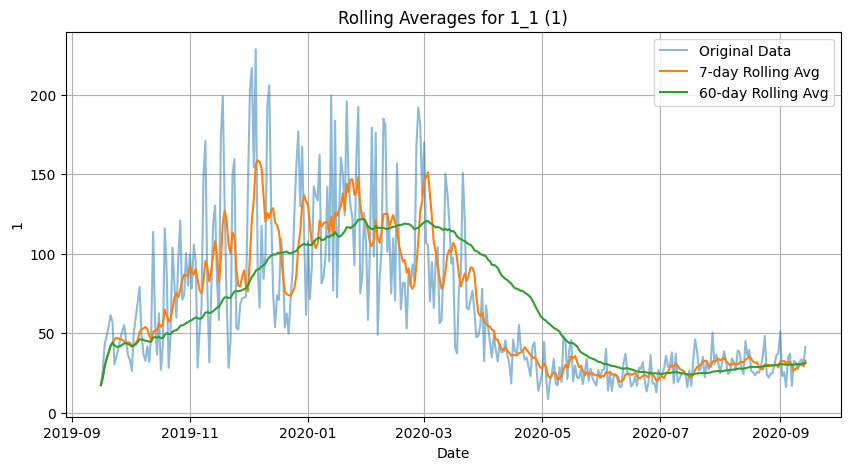

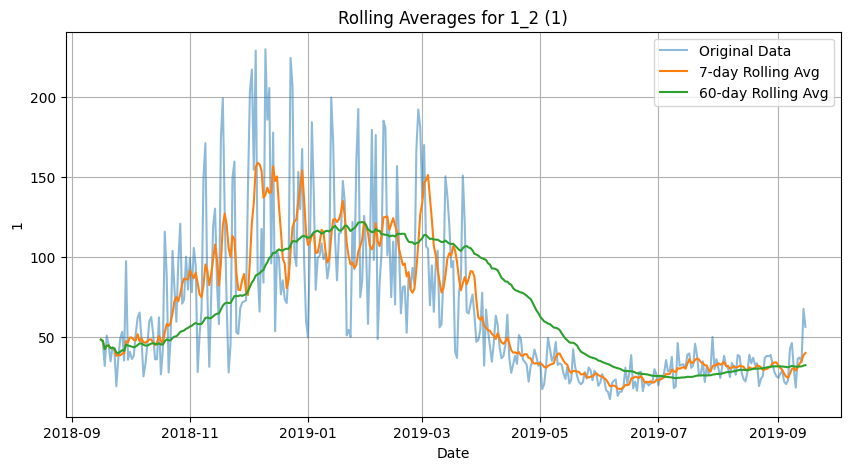

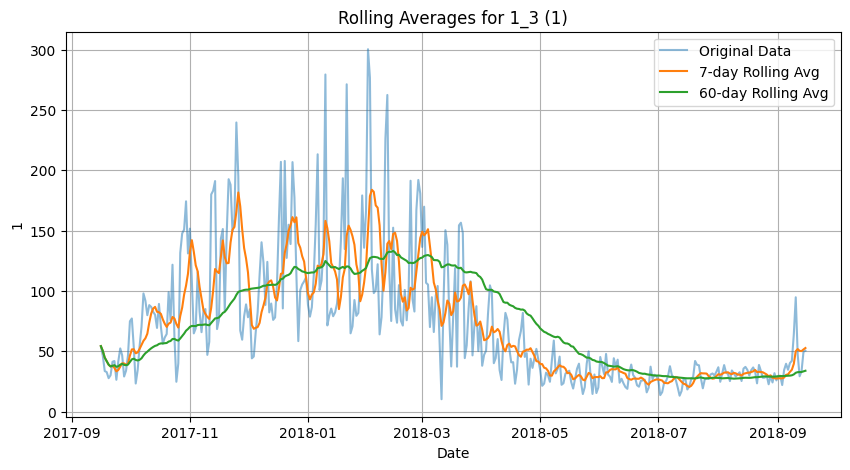

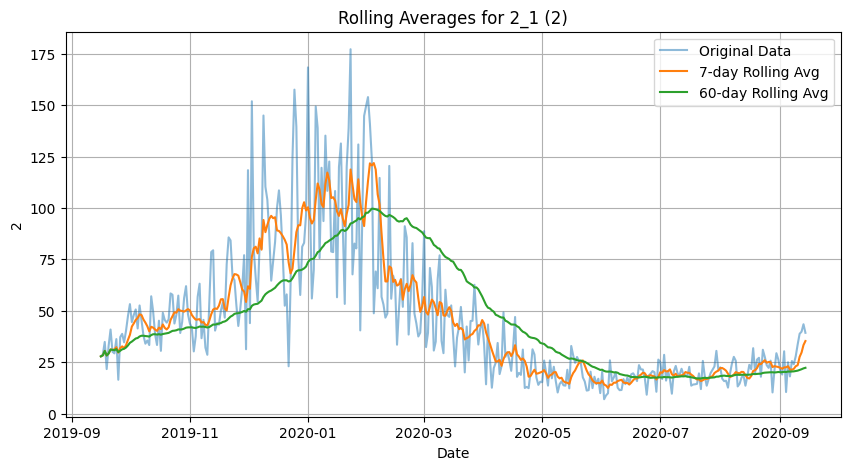

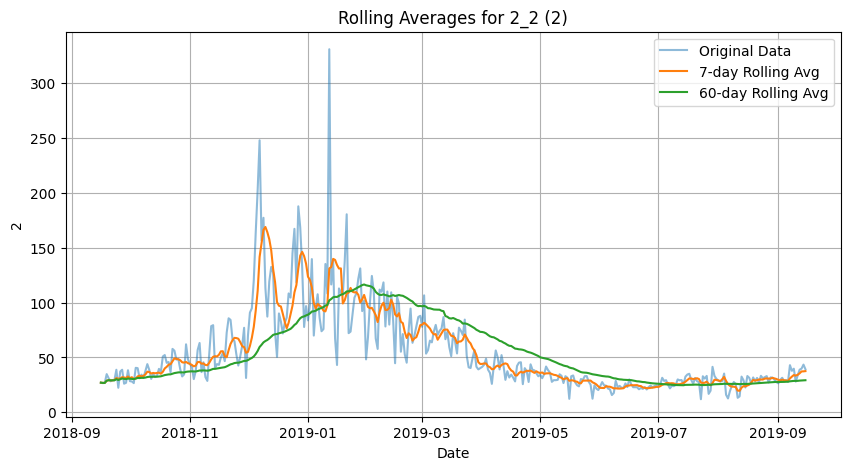

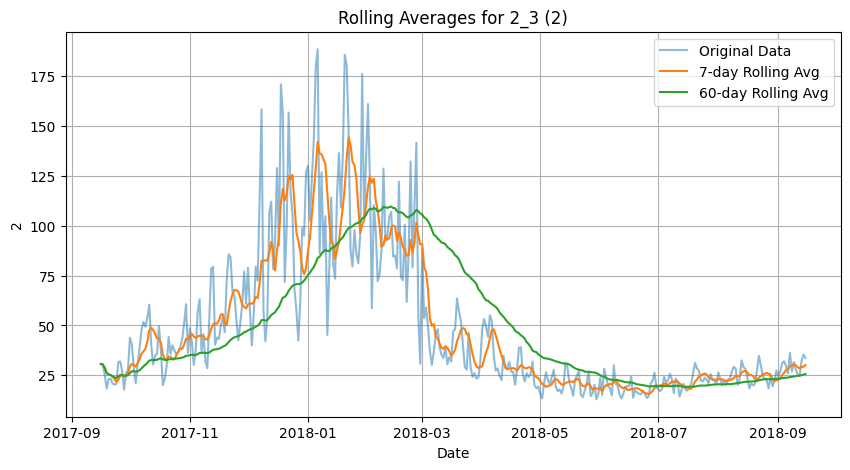

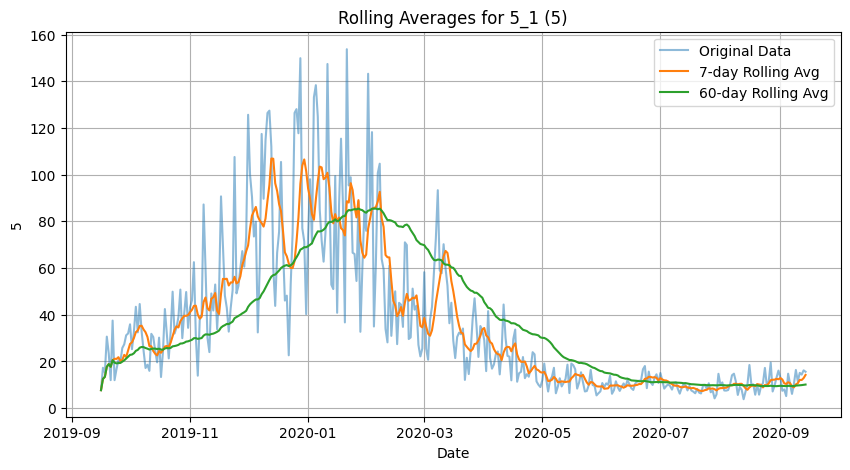

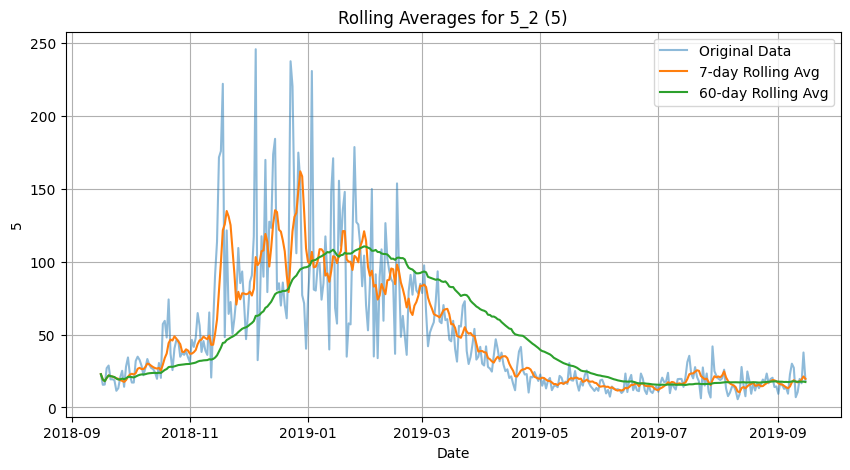

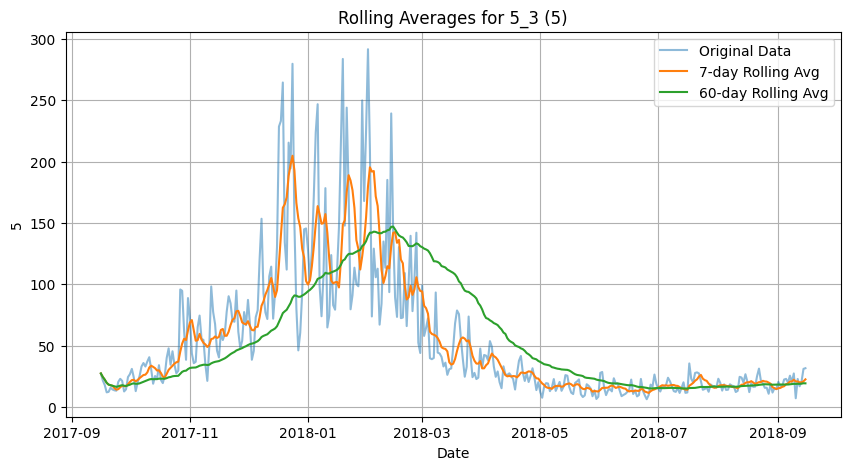

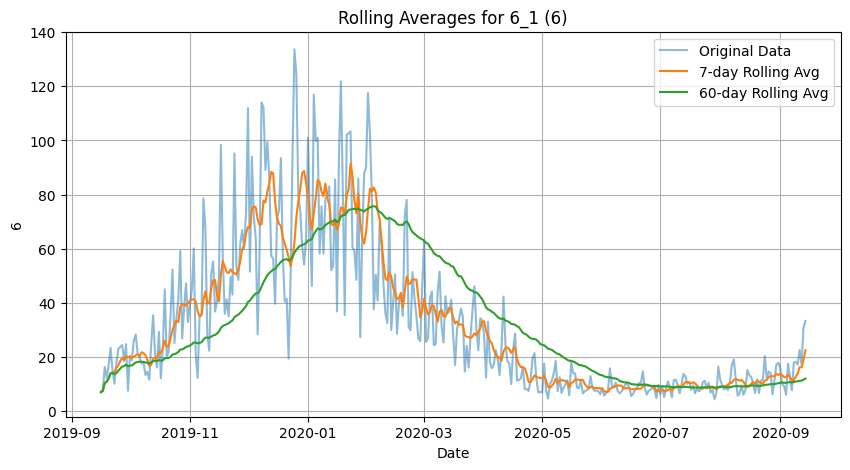

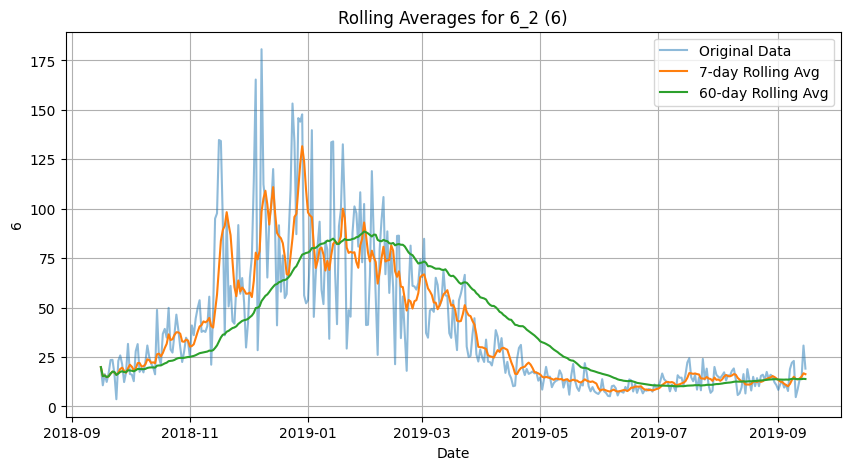

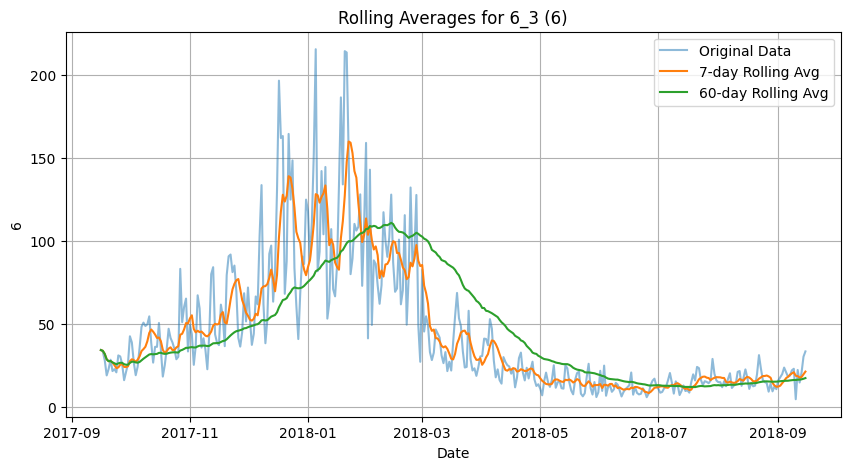

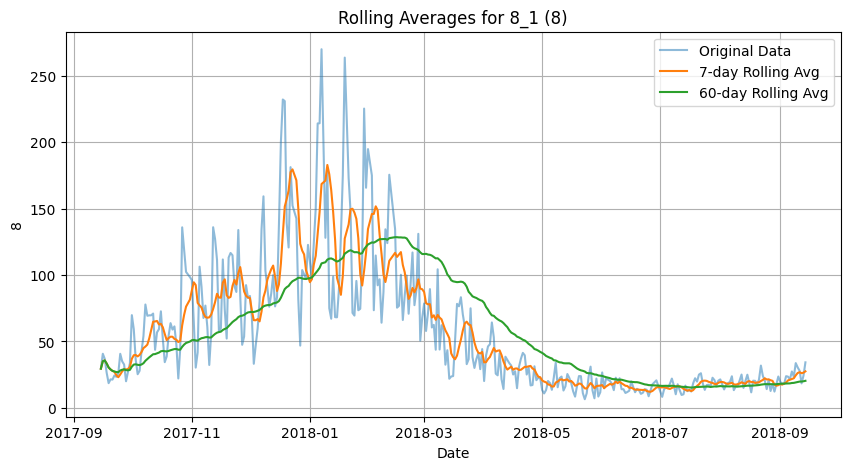

In [9]:
import matplotlib.pyplot as plt

# Define rolling window sizes
window_sizes = [7, 60]  # 7-day and 30-day moving averages

# Create rolling average plots for each dataset
for key, df in datasets.items():
    if "full_date" not in df.columns:
        print(f"⚠️ Skipping {key} (no date column)")
        continue

    # Convert date column to datetime
    df["full_date"] = pd.to_datetime(df["full_date"])
    df = df.sort_values("full_date")  # Ensure sorting

    # Identify the main data column (excluding "full_date")
    value_columns = [col for col in df.columns if col != "full_date"]
    
    for col in value_columns:
        plt.figure(figsize=(10, 5))

        # Plot raw data
        plt.plot(df["full_date"], df[col], label="Original Data", alpha=0.5)

        # Plot rolling averages
        for window in window_sizes:
            df[f"rolling_{window}"] = df[col].rolling(window=window, min_periods=1).mean()
            plt.plot(df["full_date"], df[f"rolling_{window}"], label=f"{window}-day Rolling Avg")

        plt.xlabel("Date")
        plt.ylabel(col)
        plt.title(f"Rolling Averages for {key} ({col})")
        plt.legend()
        plt.grid()
        plt.show()
